# Bigmart_Sales_Prediction

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [65]:
#Loading the datasets
train_data= pd.read_csv('Downloads\Bigmart_sales_Train.csv')
test_data=pd.read_csv('Downloads\Bigmart_sales_Test.csv')

# EDA

In [15]:
train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
train_data.shape,test_data.shape

((8523, 12), (5681, 11))

In [168]:
train_data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [174]:
train_data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [21]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [22]:
#null values count in percentage
train_data.isnull().sum()/train_data.shape[0]*100 

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [23]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [25]:
#null values count in percentage
test_data.isnull().sum()/test_data.shape[0]*100 

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In train data : We have 17% and 28% null value in item_weight and outlet_size column,  
In test data : We have 17% and 28% null value in item_weight and outlet_size column 

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Filling null Values

In [122]:
# since Item_Weight is a numerical column we will fill null values with mean of the column
train_data['Item_Weight'] =  train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())

In [39]:
#since Outlet_Size is a categorical column we will fill null values with mode of the column
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [40]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [54]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
 11  Outlet_size                5681 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 532.7+ KB


In [61]:
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0])

In [62]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Outlet_size                  0
dtype: int64

## Univariate Analysis

In [66]:
import seaborn as sns

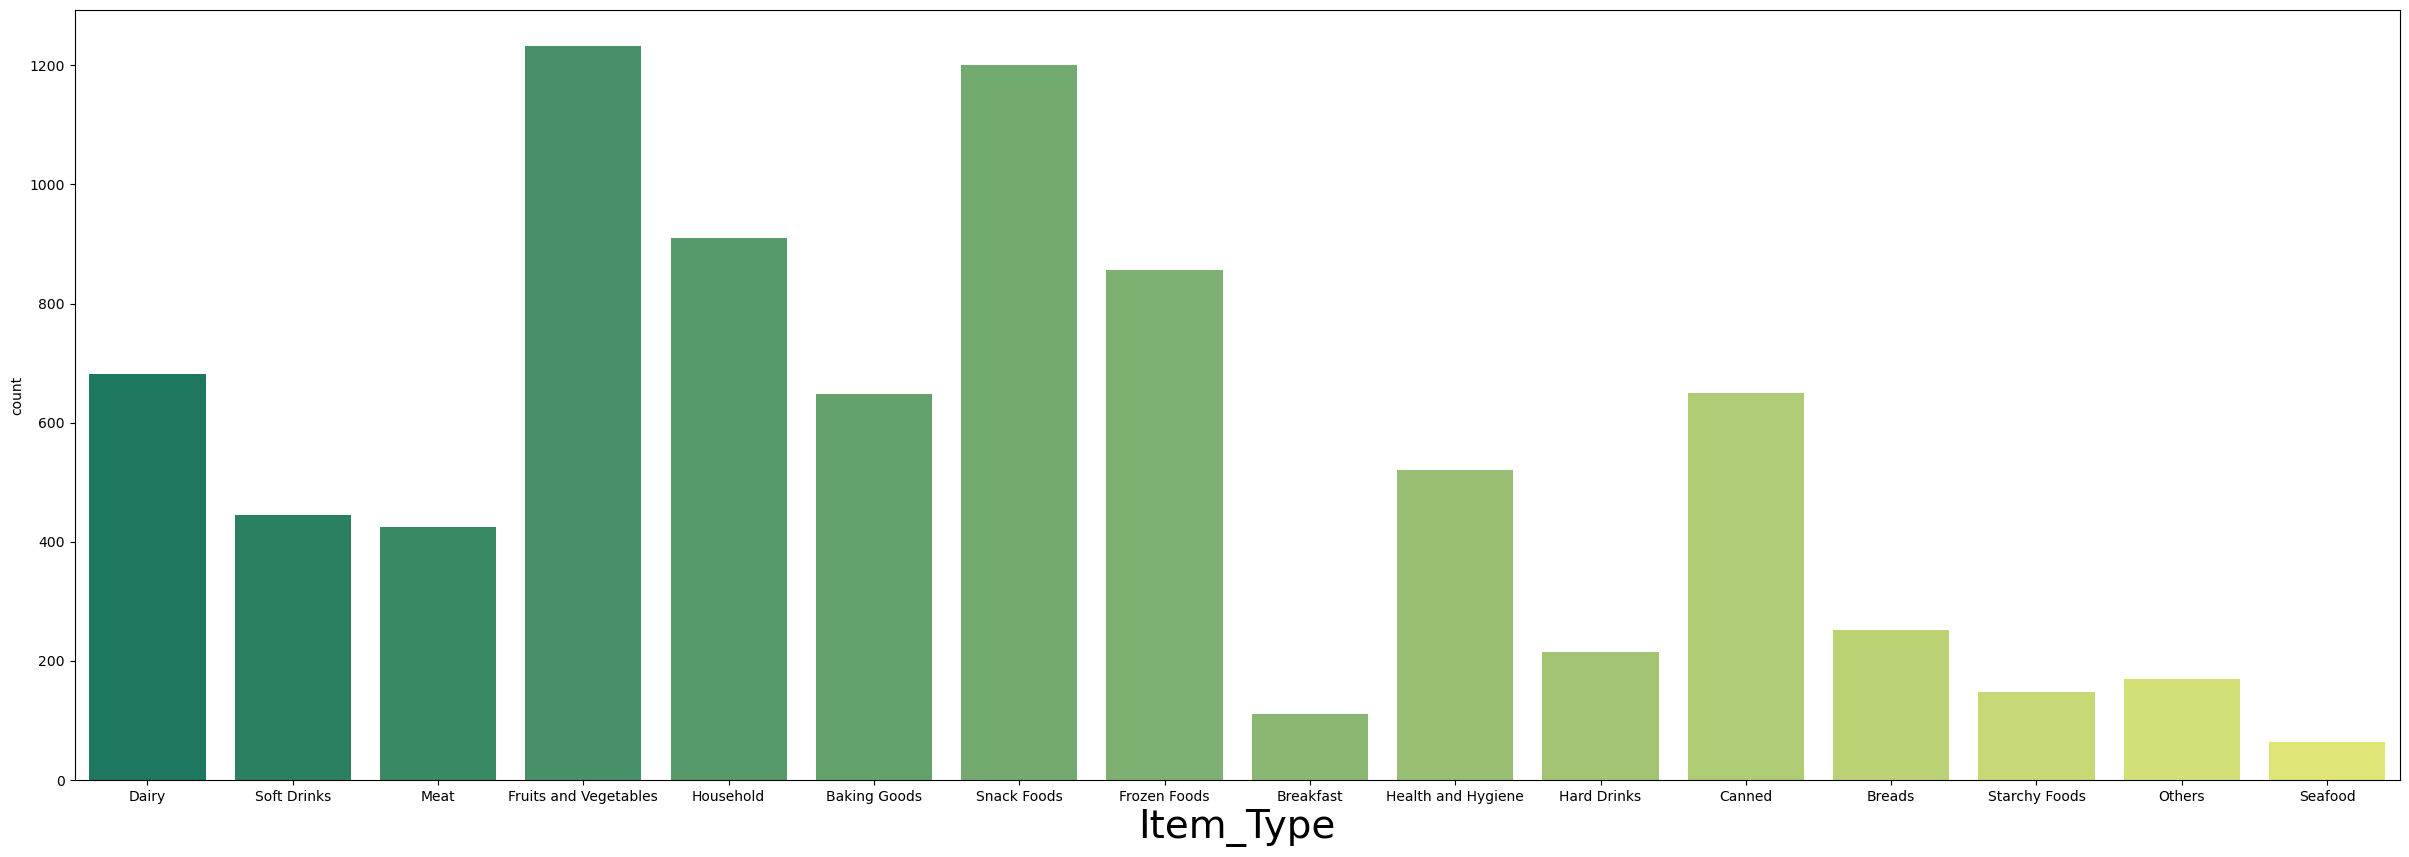

In [67]:
plt.figure(figsize=(30,10))
sns.countplot(x='Item_Type' , data=train_data ,palette='summer')
plt.xlabel('Item_Type', fontsize=28)
plt.show()

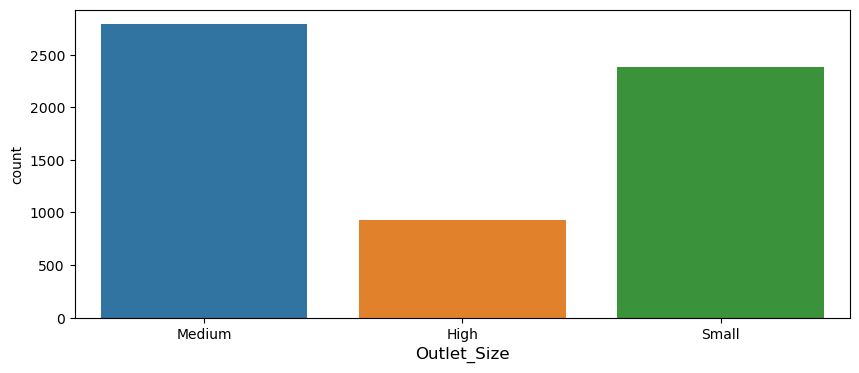

In [87]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size', data=train_data)
plt.xlabel('Outlet_Size', fontsize=12)
plt.show()


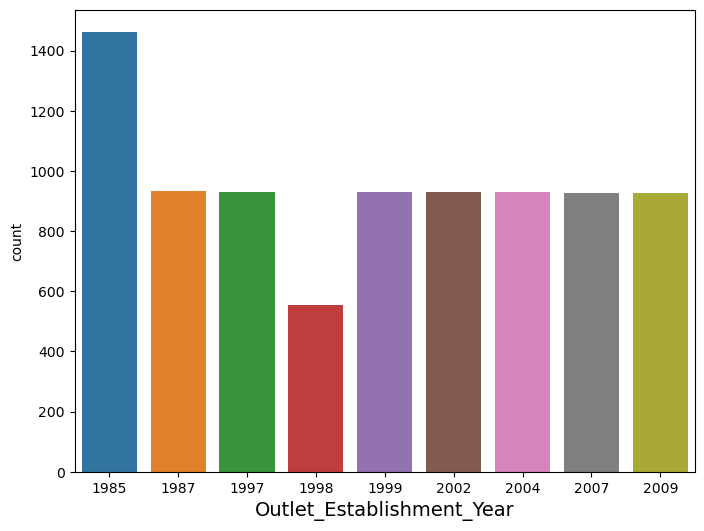

In [86]:
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Establishment_Year', data=train_data)
plt.xlabel('Outlet_Establishment_Year', fontsize=14)
plt.show()

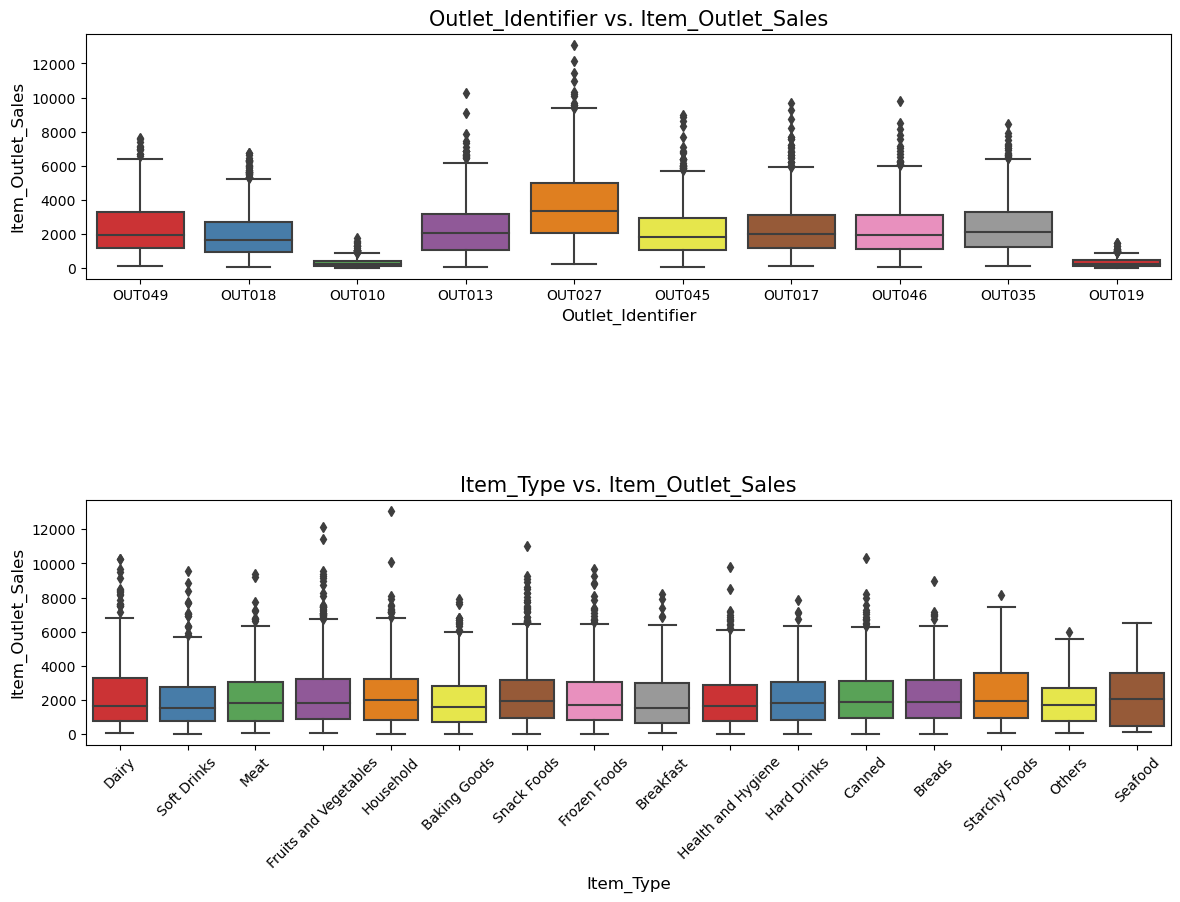

In [85]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train_data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("Outlet_Identifier", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train_data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("Item_Type", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

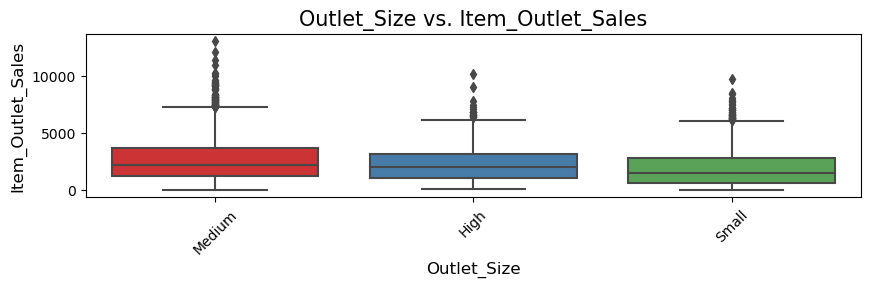

In [89]:
plt.figure(figsize = (10,6))
plt.subplot(212)
ax = sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train_data, palette="Set1")
ax.set_title("Outlet_Size vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("Outlet_Size", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

## Bivariate analysis

Text(0, 0.5, 'Outlet_Identifier')

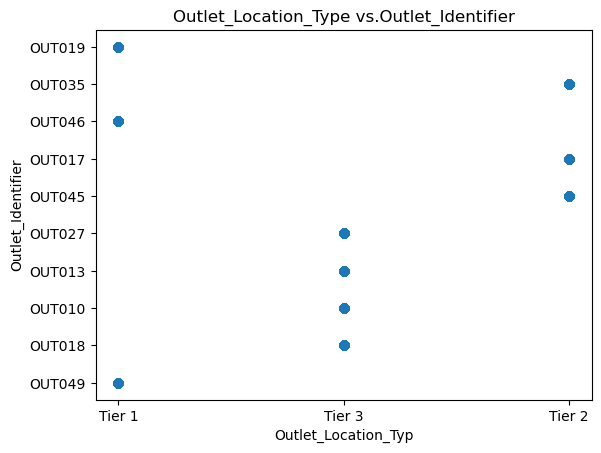

In [90]:
plt.scatter(train_data['Outlet_Location_Type']  , train_data['Outlet_Identifier'])
plt.title('Outlet_Location_Type vs.Outlet_Identifier')
plt.xlabel('Outlet_Location_Typ')
plt.ylabel('Outlet_Identifier')

In [105]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


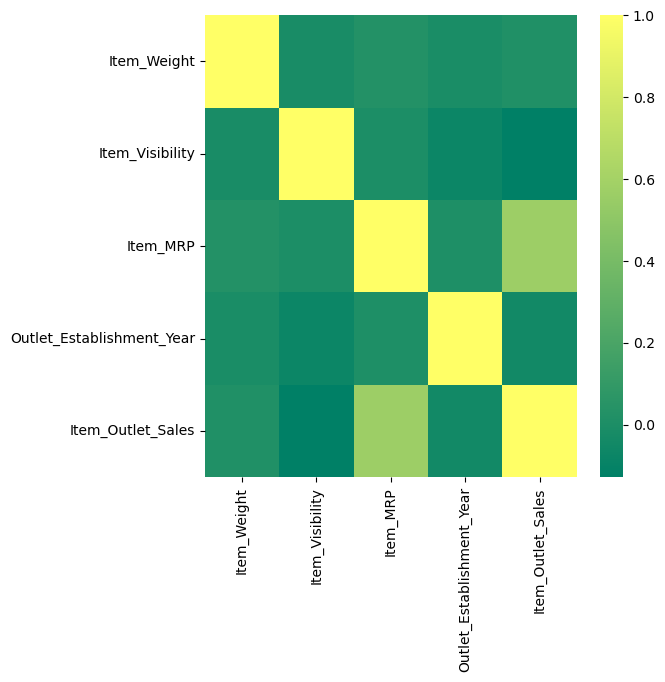

In [100]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(train_data.corr(), annot=False, cmap='summer')
plt.show()

#Encoding categorical variable

In [109]:
train_data.replace({'Item_Fat_Content' : {'low fat' : 'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}}, inplace=True)

In [110]:
train_data=train_data.replace({'Item_Fat_Content':{'Low Fat':1,"Regular":2}})
train_data['Item_Fat_Content'].value_counts()

1    5517
2    3006
Name: Item_Fat_Content, dtype: int64

#Label encoding

In [161]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal categories in the desired order
ordinal_categories = ['Small', 'Medium']

# Create an instance of OrdinalEncoder with the specified categories
encoder =OrdinalEncoder(categories=[ordinal_categories], handle_unknown="use_encoded_value", unknown_value=2)

#encoder=preprocessing.LabelEncoder()

# Fit and transform the 'Outlet_Size' column
train_data['Outlet_Size_encoded'] = encoder.fit_transform(train_data[['Outlet_Size']])

# Display the encoded DataFrame
print(train_data[['Outlet_Size', 'Outlet_Size_encoded']])

In [169]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal categories in the desired order
ordinal_categories = ['Tier 1', 'Tier 2']

# Create an instance of OrdinalEncoder with the specified categories
encoder =OrdinalEncoder(categories=[ordinal_categories], handle_unknown="use_encoded_value", unknown_value=2)

#encoder=preprocessing.LabelEncoder()

# Fit and transform the 'Outlet_Size' column
train_data['Outlet_Location_Type_encoded'] = encoder.fit_transform(train_data[['Outlet_Location_Type']])

# Display the encoded DataFrame
print(train_data[['Outlet_Location_Type', 'Outlet_Location_Type_encoded']])

     Outlet_Location_Type  Outlet_Location_Type_encoded
0                  Tier 1                           0.0
1                  Tier 3                           2.0
2                  Tier 1                           0.0
3                  Tier 3                           2.0
4                  Tier 3                           2.0
...                   ...                           ...
8518               Tier 3                           2.0
8519               Tier 2                           1.0
8520               Tier 2                           1.0
8521               Tier 3                           2.0
8522               Tier 1                           0.0

[8523 rows x 2 columns]


In [170]:
train_data['Outlet_Location_Type']=train_data['Outlet_Location_Type_encoded']

In [175]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal categories in the desired order
#ordinal_categories = ['Tier 1', 'Tier 2']

# Create an instance of OrdinalEncoder with the specified categories
#encoder =OrdinalEncoder(categories=[ordinal_categories], handle_unknown="use_encoded_value", unknown_value=2)

encoder=preprocessing.LabelEncoder()

# Fit and transform the 'Outlet_Size' column
train_data['Outlet_Type_encoded'] = encoder.fit_transform(train_data[['Outlet_Type']])

# Display the encoded DataFrame
print(train_data[['Outlet_Type', 'Outlet_Type_encoded']])

            Outlet_Type  Outlet_Type_encoded
0     Supermarket Type1                    1
1     Supermarket Type2                    2
2     Supermarket Type1                    1
3         Grocery Store                    0
4     Supermarket Type1                    1
...                 ...                  ...
8518  Supermarket Type1                    1
8519  Supermarket Type1                    1
8520  Supermarket Type1                    1
8521  Supermarket Type2                    2
8522  Supermarket Type1                    1

[8523 rows x 2 columns]


In [177]:
train_data['Outlet_Type']=train_data['Outlet_Type_encoded']

In [162]:
 # Convert df_train['Item_Type'] column to categorical data type
train_data['Item_Type'] =train_data['Item_Type'].astype('category')

# Assign label-encoded values to 'Item_Type_encoded' column
train_data['Item_Type_encoded'] = train_data['Item_Type'].cat.codes

# Display the encoded DataFrame
print(train_data[['Item_Type', 'Item_Type_encoded']])

In [157]:
train_data['Item_Type']=train_data['Item_Type_encoded']

In [163]:
train_data['Outlet_Size']=train_data['Outlet_Size_encoded']

In [149]:
train_data = train_data.drop(['Item_Identifier','Outlet_Identifier'], axis = 1)
test_data = test_data.drop(['Item_Identifier','Outlet_Identifier'], axis = 1)

#Train_Test_split

In [178]:
x=train_data.drop('Item_Outlet_Sales',axis=1)
y=train_data['Item_Outlet_Sales']

In [179]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

# Modelling

## Linear Regression

In [215]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
r1

0.5105951012871442

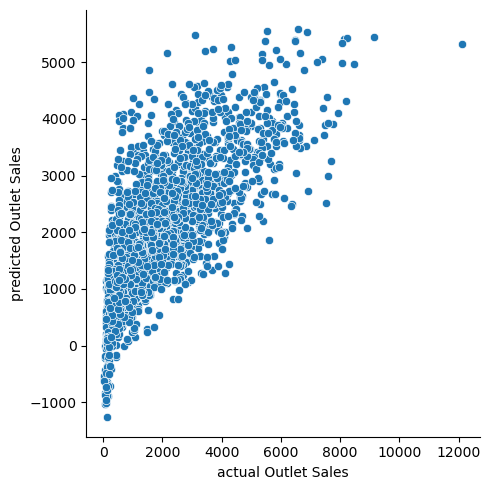

In [216]:
#Ploting result
prediction= pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_pred})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')

## Lasso Regression

In [217]:
from sklearn.linear_model import Lasso
l1 = Lasso()
l1.fit(x_train,y_train)

y_pred = l1.predict(x_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.5104852904532742

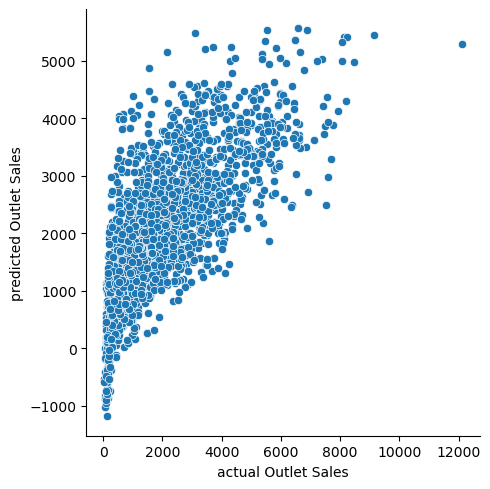

In [218]:
#Ploting result
prediction= pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_pred})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')

## KNN Regressor

In [213]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
r3 = r2_score(y_test,y_pred)
r3

0.4461849655381275

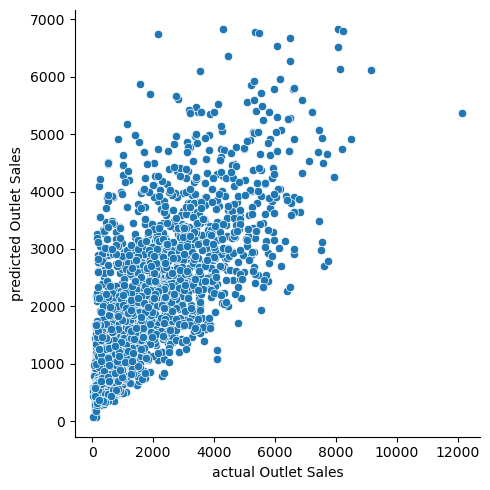

In [214]:
#Ploting result
prediction= pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_pred})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')

## Decision Tree Regressor

In [211]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred)
r4

0.5373350141246751

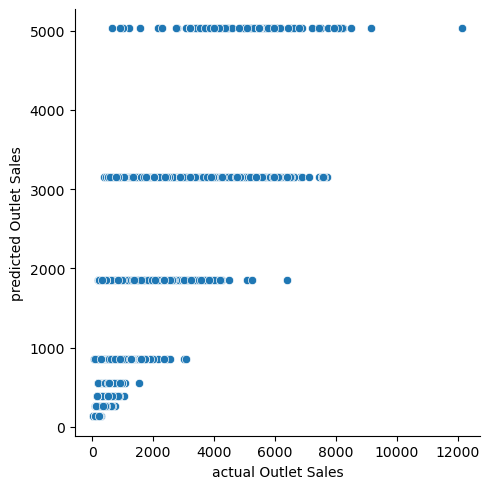

In [212]:
#Ploting result
prediction= pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_pred})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')

## RandomForest Regressor

In [219]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
r5 = r2_score(y_test,y_pred)
r5

0.5497657285742765

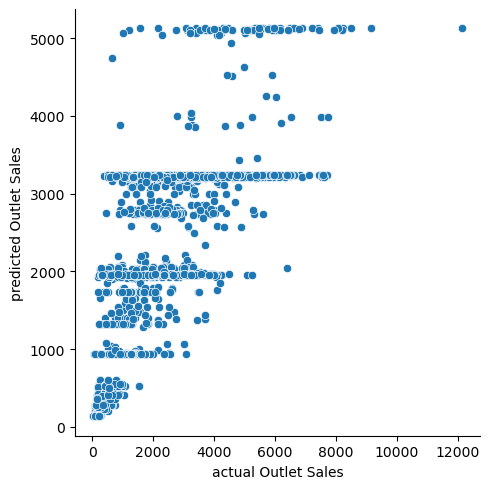

In [220]:
#Ploting result
prediction= pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_pred})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')

## XGBoost

In [192]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 2.0 MB/s eta 0:00:00


In [221]:
from xgboost import XGBRFRegressor
gbr = XGBRFRegressor()
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)
from sklearn.metrics import r2_score
r6 = r2_score(y_test,y_pred)
r6

0.5924085881239345

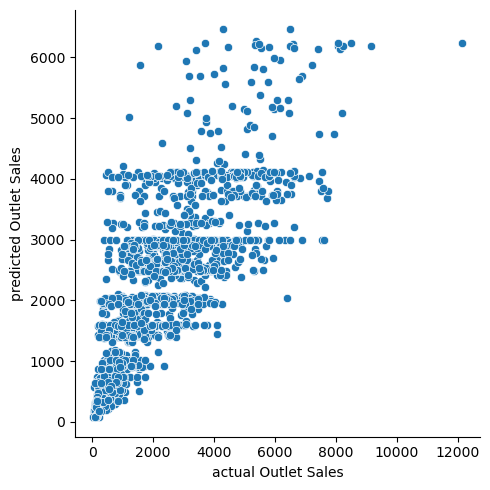

In [222]:
#Ploting result
prediction= pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_pred})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')

In [199]:
metric_results= {'Model': ['linear Regression','Lasso Regression', 'KNeighbors', 'Decision Tree','RandomForest','XGBoost'], 
                 'R Square': [r1, r2, r3,r4,r5,r6]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.510595
1,Lasso Regression,0.510485
2,KNeighbors,0.446185
3,Decision Tree,0.537335
4,RandomForest,0.549672
5,XGBoost,0.592409


## #Ploting result

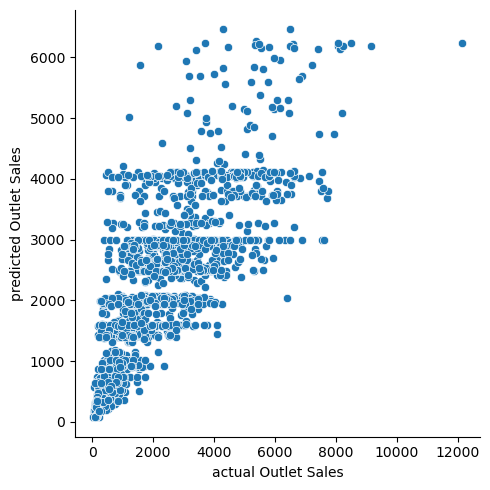

In [223]:
prediction= pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_pred})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')